In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import SpectralClustering

%matplotlib notebook

In [93]:
dataset = "2020-10-06-7"
cell = 244
pattern = 1

In [190]:
num_amps = 1000

In [191]:
weights = np.load('/Volumes/Lab/Users/praful/multielectrode/scripts/python_scripts/subsampling-weights-{}-n{}-p{}-s{}.npy'
                  .format(str(dataset), str(cell), str(pattern), str(num_amps)))

In [192]:
normed_weights = []
for i in range(len(weights)):
    unit_weights = weights[i][:, 1:] / np.linalg.norm(weights[i][:, 1:], axis=1)[:, None]
    for j in range(len(unit_weights)):
        normed_weights.append(unit_weights[j])
        
normed_weights = np.array(normed_weights)

In [193]:
normed_weights

array([[ 0.0272907 ,  0.07310755,  0.9969506 ],
       [ 0.5965184 ,  0.61583458,  0.51469754],
       [-0.6555795 , -0.70871183, -0.2606589 ],
       ...,
       [-0.68694384, -0.70324521, -0.18317843],
       [ 0.5587858 ,  0.56966063,  0.60269826],
       [-0.15551189, -0.06503379, -0.98569095]])

<IPython.core.display.Javascript object>


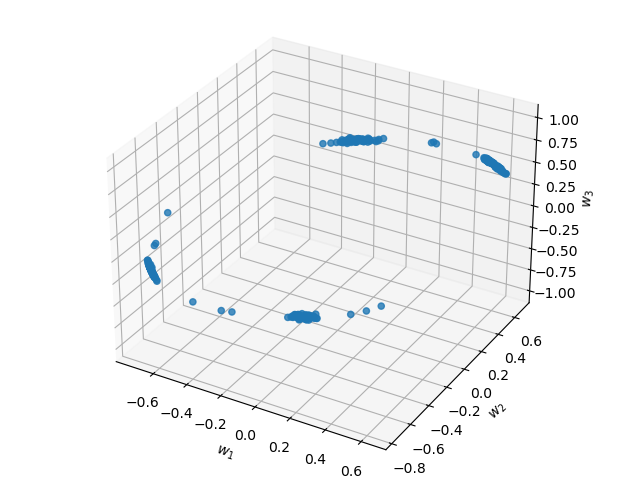

/tmp/ipykernel_15273/918270497.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [194]:
fig = plt.figure()
fig.clear()
ax = Axes3D(fig)
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
ax.set_zlabel(r'$w_3$')

scat = ax.scatter(normed_weights[:, 0], 
            normed_weights[:, 1],
            normed_weights[:, 2], alpha=0.8)

plt.show()

In [195]:
clustering = SpectralClustering(n_clusters=4).fit(normed_weights)

<IPython.core.display.Javascript object>


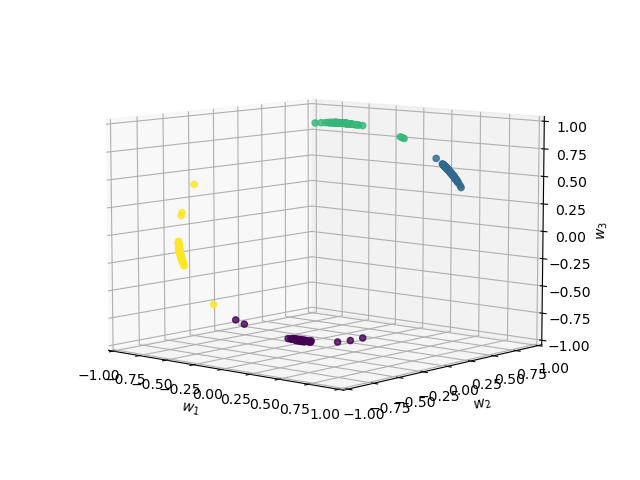

/tmp/ipykernel_15273/1986172283.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [196]:
fig = plt.figure()
fig.clear()
ax = Axes3D(fig)
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
ax.set_zlabel(r'$w_3$')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

scat = ax.scatter(normed_weights[:, 0], 
            normed_weights[:, 1],
            normed_weights[:, 2], c=clustering.labels_, alpha=0.8)

plt.show()